# Python for Astronomers - Day 2

# Matplotlib

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

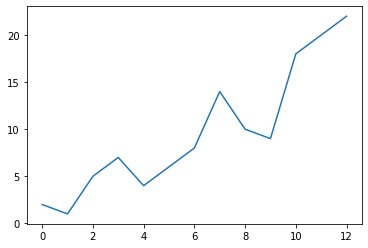

In [2]:
a = np.array([2, 1, 5, 7, 4, 6, 8, 14, 10, 9, 18, 20, 22])
plt.plot(a)
plt.show()

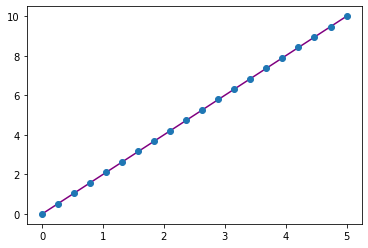

In [3]:
x = np.linspace(0, 5, 20)
y = np.linspace(0, 10, 20)

plt.plot(x, y, 'purple') # line
plt.plot(x, y, 'o')      # dots

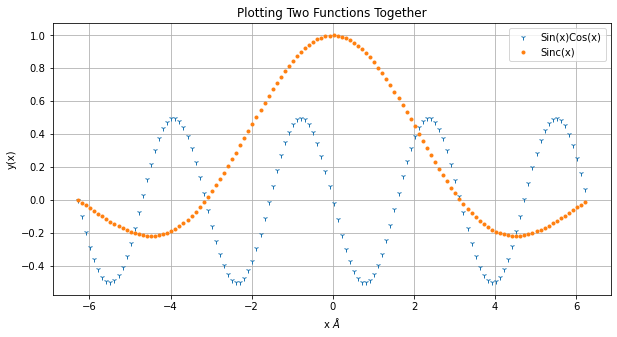

In [4]:
xmin = -2*np.pi
xmax = 2*np.pi

x = np.arange(xmin,xmax,0.1) #x from xmin to xmax

y1 = -np.sin(x)*np.cos(x)  #f(x) = sin(x)*cos(x)
y2 = np.sin(x)/x

plt.figure(figsize=(10,5)) #sets up the figure size

plt.xlabel('x $\AA$') #xlabel
plt.ylabel('y(x)') #ylabel
plt.title("Plotting Two Functions Together")
plt.plot(x,y1,'1',lw=2,label="Sin(x)Cos(x)")
plt.plot(x,y2,'.',lw=2,label="Sinc(x)")
plt.legend()
plt.grid()

# plt.savefig("twofunc.pdf")
plt.show()

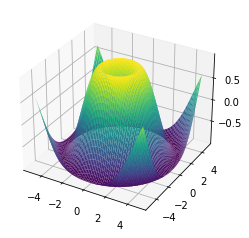

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
X = np.arange(-5, 5, 0.15)
Y = np.arange(-5, 5, 0.15)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='viridis')
plt.show()

## Subplots

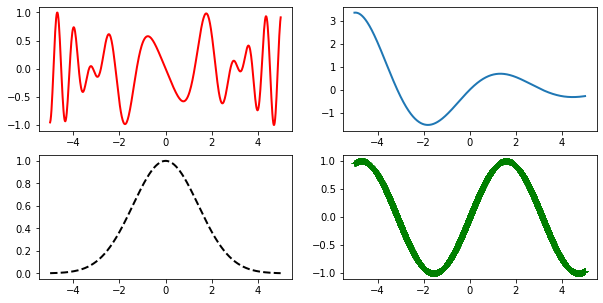

In [6]:
xmin = -5; xmax =5; Npoints=500
dx = (xmax-xmin)/Npoints


x1 = np.arange(xmin,xmax,dx) #creating different x arrays
x2 = np.arange(xmin,xmax,dx/20)

y1 = -np.sin(x1)*np.cos(x1*x1)
y2 = np.exp(-x2/4)*np.sin(x2)


y3 = np.exp(-x1**2/4)
y4 = np.sin(x2)

plt.figure(1,figsize=(10,5))

plt.subplot(2,2,1)   #2 rows, 2 column, plot1
plt.plot(x1,y1,'r',lw=2)

plt.subplot(2,2,2)#2 rows, 2 column,plot2
plt.plot(x2,y2,'-',lw=2)

plt.subplot(2,2,3)#2 rows, 2 column,plot3
plt.plot(x1,y3,'k--',lw=2)

plt.subplot(2,2,4)#2 rows, 2 column,plot4
plt.plot(x2,y4,'+g',lw=1)
plt.show()

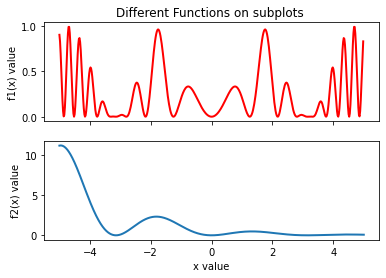

In [7]:
fig,ax = plt.subplots(2,1,sharex=True)
ax[0].plot(x1,y1*y1,'r',lw=2)
ax[0].set_title("Different Functions on subplots ")
ax[1].set_xlabel("x value")
ax[1].set_ylabel("f2(x) value")
ax[0].set_ylabel("f1(x) value")
ax[1].plot(x2,y2*y2,'-',lw=2)

# plt.savefig("subplotexample.pdf")
plt.show()

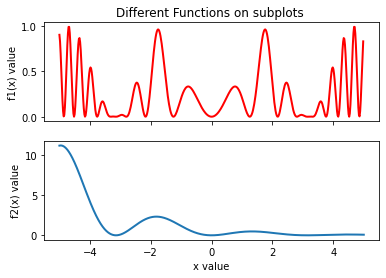

In [8]:
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True)
ax1.plot(x1,y1*y1,'r',lw=2)
ax1.set_title("Different Functions on subplots ")
ax2.set_xlabel("x value")
ax2.set_ylabel("f2(x) value")
ax1.set_ylabel("f1(x) value")
ax2.plot(x2,y2*y2,'-',lw=2)

# plt.savefig("subplotexample.pdf")
plt.show()

### Animations

<IPython.core.display.Javascript object>


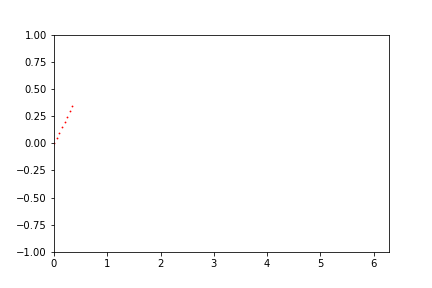

In [9]:
import matplotlib.animation as anime

%matplotlib Notebook

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro',markersize =0.8)
def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = anime.FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

## Example

Modelling the spectral line broadening of a star from both Gaussian sources and Lorenztian sources.

In [10]:
import numpy as np
import astropy.units as u
import matplotlib.pyplot as plt
from scipy.special import voigt_profile
import matplotlib.cm as cm
from matplotlib.colors import LogNorm
import scipy.integrate as integrate
%matplotlib inline

In [11]:
Ha = 6562.8 * u.AA

vel = np.linspace(-500, 500, 101) * u.km / u.s
wavs = vel * Ha / (299792.458 * u.km / u.s)

tau_gauss = voigt_profile(wavs.value, 1.0885531, 0)
tau_gauss = tau_gauss / tau_gauss.max()
int_gauss = np.exp(-tau_gauss)

tau_lor = voigt_profile(wavs.value, 0, 1.0885531)
tau_lor = tau_lor / tau_lor.max()
int_lor = np.exp(-tau_lor)

tau_voigt = voigt_profile(wavs.value, 1.0885531, 1.0885531)
tau_voigt = tau_voigt / tau_voigt.max()
int_voigt = np.exp(-tau_voigt)

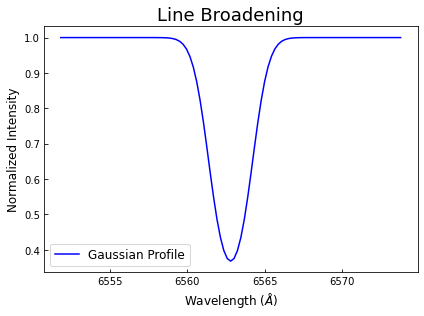

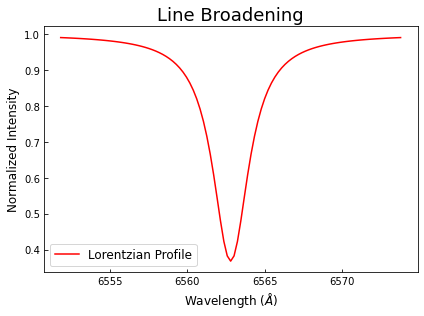

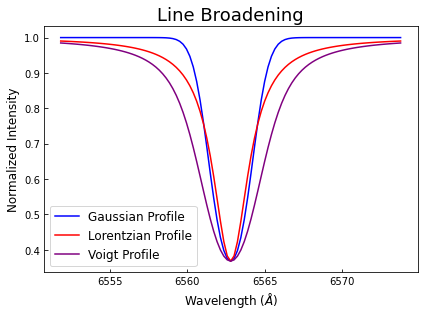

In [12]:
plt.rc('axes', labelsize=12)
plt.rc('figure', titlesize=18)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=12)

fig, ax = plt.subplots(1, 1, figsize=(6,4.5))

ax.plot(wavs+Ha, int_gauss, color='b', label = 'Gaussian Profile')
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Normalized Intensity')
ax.set_title('Line Broadening', fontsize=18)
ax.tick_params(axis='both', direction='in', which='both')
ax.legend(loc='best')
fig.tight_layout()
#plt.savefig(r'C:\Users\brock\OneDrive\School\Astrophysics\HW\HW3\HW3_4_c.pdf')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6,4.5))

ax.plot(wavs+Ha, int_lor, color='r', label = 'Lorentzian Profile')
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Normalized Intensity')
ax.set_title('Line Broadening', fontsize=18)
ax.tick_params(axis='both', direction='in', which='both')
ax.legend(loc='best')
fig.tight_layout()
#plt.savefig(r'C:\Users\brock\OneDrive\School\Astrophysics\HW\HW3\HW3_4_d.pdf')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(6,4.5))

ax.plot(wavs+Ha, int_gauss, color='b', label = 'Gaussian Profile')
ax.plot(wavs+Ha, int_lor, color='r', label = 'Lorentzian Profile')
ax.plot(wavs+Ha, int_voigt, color='purple', label = 'Voigt Profile')
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Normalized Intensity')
ax.set_title('Line Broadening', fontsize=18)
ax.tick_params(axis='both', direction='in', which='both')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

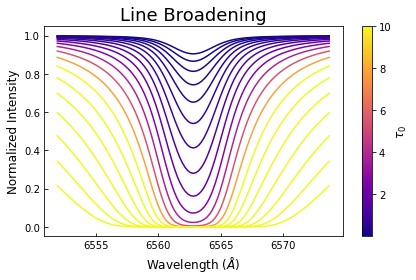

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))

tau_0 = np.logspace(-1, 2, 20)
colors = cm.plasma(tau_0/tau_0.max()*10)
W = np.array([])

for i in range(len(tau_0)):
    tau_voigt = voigt_profile(wavs.value, 1.0885531, 1.0885531)
    tau_voigt = tau_voigt / tau_voigt.max() * tau_0[i]
    int_voigt = np.exp(-tau_voigt)
    eq_w = integrate.simpson(1 - int_voigt, wavs.value)
    W = np.append(W, eq_w)
    ax.plot(wavs+Ha, int_voigt, color=colors[i])#, label = 'Voigt Profile')

sm = plt.cm.ScalarMappable(cmap=cm.plasma, norm=plt.Normalize(vmin=tau_0.min()/10, vmax=tau_0.max()/10))
plt.colorbar(sm, label=r'$\tau_0$')
ax.set_xlabel('Wavelength ($\AA$)')
ax.set_ylabel('Normalized Intensity')
ax.set_title('Line Broadening', fontsize=18)
ax.tick_params(axis='both', direction='in', which='both')
fig.tight_layout()
plt.show()

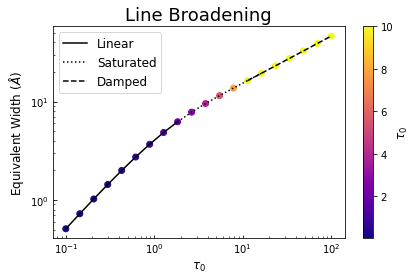

In [14]:
vel = np.linspace(-10000, 10000, 1000) * u.km / u.s
wavs = vel * 6526.8 * u.AA / (299792.458 * u.km / u.s)
tau_0 = np.logspace(-1, 2, 20)
colors = cm.plasma(tau_0/tau_0.max()*10)
W = np.array([])

for i in range(len(tau_0)):
    tau_voigt = voigt_profile(wavs.value, 1.0885531, 1.0885531)
    tau_voigt = tau_voigt / tau_voigt.max() * tau_0[i]
    int_voigt = np.exp(-tau_voigt)
    eq_w = integrate.simpson(1 - int_voigt, wavs.value)
    W = np.append(W, eq_w)
    ax.plot(wavs, int_voigt, color=colors[i])#, label = 'Voigt Profile')

fig, ax = plt.subplots(1, 1, figsize=(6,4))

ax.scatter(tau_0, W, color=colors)
ax.plot(tau_0[tau_0<=2], W[tau_0<=2], c='k', ls='-', label='Linear')
ax.plot(tau_0[(tau_0>=1.8) & (tau_0<=20)], W[(tau_0>=1.8) & (tau_0<=20)], c = 'k', ls=':', label='Saturated')
ax.plot(tau_0[tau_0>=10], W[tau_0>=10], c='k', ls='--', label='Damped')
plt.colorbar(sm, label=r'$\tau_0$')
ax.set_xlabel(r'$\tau_0$')
ax.set_ylabel('Equivalent Width ($\AA$)')
ax.set_title('Line Broadening', fontsize=18)
ax.tick_params(axis='both', direction='in', which='both')
ax.set_yscale('log')
ax.set_xscale('log')
ax.legend(loc='best')
fig.tight_layout()
plt.show()

# File Handling

## CSV/TXT

### Pandas

```python
import pandas as pd

# If all of your columns are the same type:

x = pd.read_csv('music.csv', header=0).values

print(x)
```

```[['Billie Holiday' 'Jazz' 1300000 27000000]
 ['Jimmie Hendrix' 'Rock' 2700000 70000000]
 ['Miles Davis' 'Jazz' 1500000 48000000]
 ['SIA' 'Pop' 2000000 74000000]]```

```python
# You can also simply select the columns you need:

x = pd.read_csv('music.csv', usecols=['Artist', 'Plays']).values

print(x)
```

```[['Billie Holiday' 27000000]
 ['Jimmie Hendrix' 70000000]
 ['Miles Davis' 48000000]
 ['SIA' 74000000]]```

In [15]:
import pandas as pd

In [16]:
titanic = pd.read_csv(r'/d/users/brock/Python_Tutorial/titanic.csv')

In [17]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [18]:
name = np.array(titanic['Name'])

In [19]:
name

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

### Numpy

```python
numpy.loadtxt(fname, dtype='float', comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0 encoding='bytes', max_rows=None)
```

<div>
<img src="https://cdn-coiao.nitrocdn.com/CYHudqJZsSxQpAPzLkHFOkuzFKDpEHGF/assets/static/optimized/rev-85bf93c/wp-content/uploads/2099/04/numpy-loadtxt_simple-visual-example.png" width="500"/>
</div>

In [20]:
import numpy as np

In [21]:
titanic = np.loadtxt(r'/d/users/brock/Python_Tutorial/titanic.csv')

ValueError: could not convert string to float: 'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked'

In [22]:
model = np.loadtxt(r'/d/hya1/BS/model_spectra/conv/conv42016000225.txt', usecols=(0,1), skiprows=1)
wavs = model[:,0]
flux = model[:,1]

Text(0, 0.5, 'Normalized Flux')

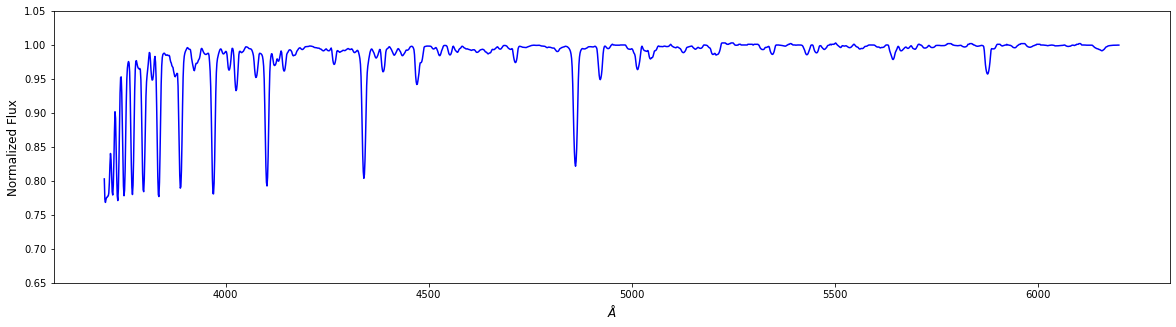

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize = (20,5))
plt.plot(wavs, flux, color = 'b')
plt.ylim(0.65, 1.05)
plt.xlabel('$\AA$')
plt.ylabel('Normalized Flux')

In [24]:
np.savetxt(r'/d/users/brock/Python_Tutorial/fluxes.txt', flux)

### Example

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from matplotlib import cm
from matplotlib.colors import Normalize, LogNorm

%matplotlib inline

In [26]:
data = pd.read_csv(r"/d/users/brock/Python_Tutorial/Gaia_200pc_Gle16.csv")

In [27]:
df = pd.DataFrame(data, columns=['source_id', 'parallax', 'phot_g_mean_mag','bp_rp','ra','dec'])
df = df[::10]

In [28]:
source, parallax_mas, G, bp_rp, ra, dec = np.array(df['source_id']),np.array(df['parallax']),np.array(df['phot_g_mean_mag']),np.array(df['bp_rp']),np.array(df['ra']),np.array(df['dec'])

In [29]:
parallax = parallax_mas/1000
distance = 1/parallax

M = G - 5 * np.log10(distance/10)

In [30]:
adwarf = ((M > 0.7) & (M < 2.4) & (bp_rp > -0.3) & (bp_rp < 0.6))
fdwarf = ((M > 2.4) & (M < 4.2) & (bp_rp > 0.1) & (bp_rp < 1.0))
gdwarf = ((M > 4.2) & (M < 5.4) & (bp_rp > 0.5) & (bp_rp < 1.2))
kdwarf = ((M > 5.4) & (M < 8.0) & (bp_rp > 0.7) & (bp_rp < 2.1))
mdwarf = ((M > 8.0) & (M < 15.0) & (bp_rp > 1.6) & (bp_rp < 5.0))
rest = np.invert((adwarf | gdwarf | fdwarf | kdwarf | mdwarf))

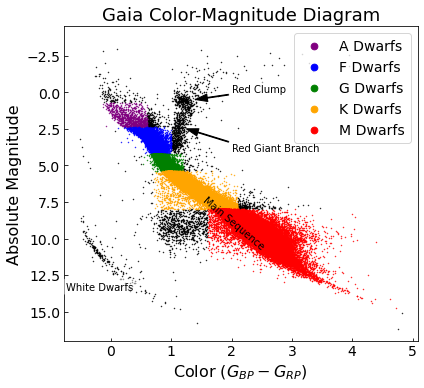

In [31]:
plt.rc('axes', labelsize=16)
plt.rc('figure', titlesize=20)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

fig, ax = plt.subplots(figsize = (6,5.5))

ax.scatter(bp_rp[rest], M[rest], c='k', s = 0.2)
ax.scatter(bp_rp[adwarf], M[adwarf], c = 'purple', s = 0.2, label = 'A Dwarfs')
ax.scatter(bp_rp[fdwarf], M[fdwarf], c = 'blue', s = 0.2, label = 'F Dwarfs')
ax.scatter(bp_rp[gdwarf], M[gdwarf], c = 'green', s = 0.2, label = 'G Dwarfs')
ax.scatter(bp_rp[kdwarf], M[kdwarf], c = 'orange', s = 0.2, label = 'K Dwarfs')
ax.scatter(bp_rp[mdwarf], M[mdwarf], c = 'red', s = 0.2, label = 'M Dwarfs')

ax.text(-0.75, 13.5, 'White Dwarfs',bbox=dict(boxstyle="round,pad=0.3",
                      fc="white", ec="white", lw=0, alpha = 0.5))
ax.annotate('Red Clump', xy=(1.4, 0.5),
             xycoords='data',
             xytext=(2, 0),
             textcoords = 'data',
             arrowprops=dict(facecolor='black', width = 0.75, headwidth = 7.5),
            bbox=dict(boxstyle="round,pad=0.3",
                      fc="white", ec="white", lw=0, alpha = 0.5)
           )
ax.annotate('Red Giant Branch', xy=(1.25, 2.5),
             xycoords='data',
             xytext=(2, 4),
             textcoords = 'data',
             arrowprops=dict(facecolor='black', width = 0.75, headwidth = 7.5),
            bbox=dict(boxstyle="round,pad=0.3",
                      fc="white", ec="gray", lw=0, alpha = 0.5)
           )
ax.text(1.5, 10.75, 'Main Sequence', rotation=-40)

ax.set_ylim([17,-4.5])
ax.set_xlabel('Color ($G_{BP} - G_{RP}$)')
ax.set_ylabel('Absolute Magnitude')
ax.set_title('Gaia Color-Magnitude Diagram', fontsize=18)
ax.tick_params(axis='both', direction='in', which='both')
ax.legend(loc = 'best', markerscale=15.,)
fig.tight_layout()
plt.show()

## FITS

The Flexible Image Transport System (FITS) is a digital file format which can be used to efficiently store tables or multi-dimensional data arrays, such as 2-D images. It was designed for astronomical data, so it includes many features optimised for use with such data, and is the most common digital file format in use in astronomy. The astropy.io.fits sub-package allows you to read, manipulate and write FITS formatted data, so that in combination with other Python and Astropy functions you can easily work with and analyse astronomical data.

FITS files are organised in a particular way:

    Header Data Units (HDUs) are the highest-level component of a FITS file, consisting of a header and some type of data, which may be a table or a multi-dimensional data-array such as an image. The header contains the ‘metadata’ which describes the associated data.
    A FITS file may consist of multiple HDUs, the first of which is the primary HDU, followed by extensions denoted by an integer starting from 1. The primary HDU is listed as extension 0.

In this episode we will look at how to use astropy.io.fits to determine the structure and contents of FITS files, and how to read in data and metadata (‘header’ information) from them. It is also possible to write new FITS files, or edit existing ones. We will not describe this here but you can find out more via the official documentation for astropy.io.fits here.

![fits](https://camo.githubusercontent.com/4911e9c280e9ebc9679fd364df723fee3368514cc530f5dee562292209b13af9/687474703a2f2f7777772e73747363692e6564752f696e737472756d656e74732f77667063322f57667063325f6468622f696d616765732f696e74726f5f636832612e676966)

### Open

In [32]:
from astropy.io import fits

fits_image_filename = fits.util.get_testdata_filepath('test0.fits')

hdul = fits.open(fits_image_filename)

In [33]:
hdul.info()

Filename: /usr/local/Anaconda2022/lib/python3.9/site-packages/astropy/io/fits/tests/data/test0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     138   ()      
  1  SCI           1 ImageHDU        61   (40, 40)   int16   
  2  SCI           2 ImageHDU        61   (40, 40)   int16   
  3  SCI           3 ImageHDU        61   (40, 40)   int16   
  4  SCI           4 ImageHDU        61   (40, 40)   int16   


### Headers

In [34]:
hdr = hdul[0].header

In [35]:
hdr

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
GROUPS  =                    F / data has groups                                
NEXTEND =                    4 / Number of standard extensions                  
BSCALE  =           1.000000E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =           3.276800E4 /                                                
ORIGIN  = 'NOAO-IRAF FITS Image Kernel Aug 1 1997' / FITS file originator       
DATE    = '01/04/99  '         / Date FITS file was generated                   
IRAF-TLM= 'xxx     '              / Time of last modification                   
                                                                                
              / GROUP PARAME

In [36]:
hdr[9]

'01/04/99'

In [37]:
hdr['observer']

KeyError: "Keyword 'OBSERVER' not found."

In [38]:
hdr.set('observer', 'Edwin Hubble')

In [39]:
hdr['observer']

'Edwin Hubble'

### Data

In [40]:
data = hdul[1].data

In [41]:
data

array([[313, 312, 313, ..., 312, 313, 313],
       [315, 315, 313, ..., 312, 314, 313],
       [313, 313, 312, ..., 314, 312, 313],
       ...,
       [314, 313, 312, ..., 312, 313, 311],
       [313, 315, 312, ..., 313, 313, 312],
       [312, 314, 314, ..., 314, 311, 314]], dtype=int16)

In [42]:
data.shape

(40, 40)

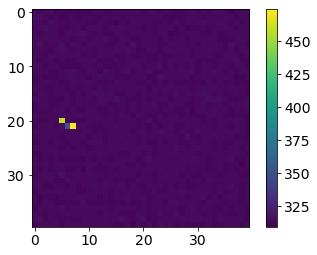

In [43]:
plt.imshow(data)
plt.colorbar()
plt.show()

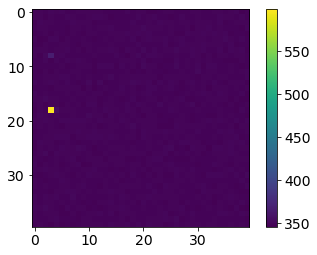

In [44]:
data2 = hdul[2].data
plt.imshow(data2)
plt.colorbar()
plt.show()

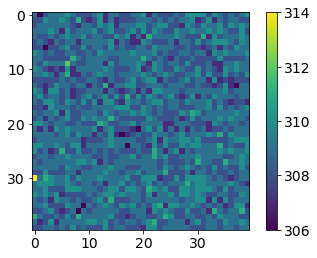

In [45]:
data3 = hdul[3].data
plt.imshow(data3)
plt.colorbar()
plt.show()

In [46]:
hdul.writeto('newfile.fits', overwrite='True')

In [47]:
hdul.close()

### Creating a new FITS File

In [48]:
a = np.arange(100)
b = np.empty(1000)

In [49]:
hdu1 = fits.PrimaryHDU(a)
hdu2 = fits.ImageHDU(b)

In [50]:
hdul = fits.HDUList([hdu1, hdu2])
hdul.writeto('new1.fits', overwrite=True)

## Example
Plotting an RGB image.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.visualization import make_lupton_rgb

from matplotlib.colors import LogNorm

In [52]:
M42u = fits.open('/d/users/brock/Python_Tutorial/m42u.fits')
M42i = fits.open('/d/users/brock/Python_Tutorial/m42i.fits')
M42g = fits.open('/d/users/brock/Python_Tutorial/m42g.fits')

In [53]:
M42u.info()

Filename: /d/users/brock/Python_Tutorial/m42u.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      96   (2048, 1489)   float32   
  1                1 ImageHDU         6   (2048,)   float32   
  2                1 BinTableHDU     27   1R x 3C   [49152E, 2048E, 1489E]   
  3                1 BinTableHDU     79   1R x 31C   [J, 3A, J, A, D, D, 2J, J, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, E, E]   


In [54]:
M42u[0].header

SIMPLE  =                    T /                                                
BITPIX  =                  -32 / 32 bit floating point                          
NAXIS   =                    2                                                  
NAXIS1  =                 2048                                                  
NAXIS2  =                 1489                                                  
EXTEND  =                    T /Extensions may be present                       
BZERO   =              0.00000 /Set by MRD_SCALE                                
BSCALE  =              1.00000 /Set by MRD_SCALE                                
TAI     =        4649973257.37 / 1st row Number of seconds since Nov 17 1858    
RA      =            83.820000 / 1st row RA of telescope boresight (deg)        
DEC     =           -5.349071  / 1st row Dec of telescope boresight (degrees)   
SPA     =             180.000  / 1st row Cam col position angle wrt N (deg)     
IPA     =             137.18

In [55]:
data_u = M42u[0].data
data_i = M42i[0].data
data_g = M42g[0].data

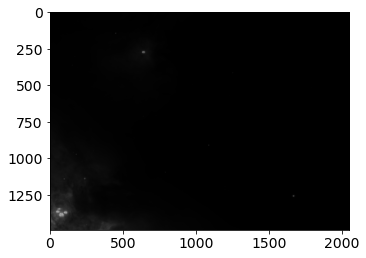

In [56]:
plt.imshow(data_u, cmap='gray')
plt.show()

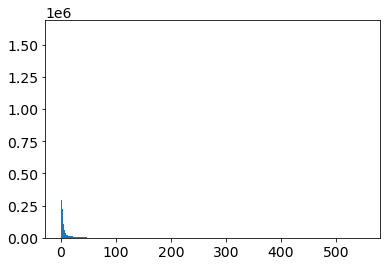

In [57]:
hist = plt.hist(data_u.flat, bins = 500)
plt.show()

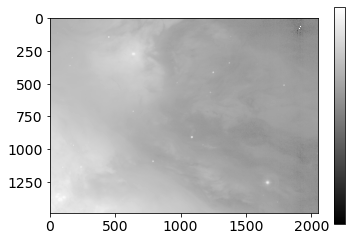

In [58]:
plt.imshow(data_u, cmap='gray', norm=LogNorm())
cbar = plt.colorbar(ticks=[4e3, 1e4, 2e4])
cbar.ax.set_yticklabels(['5,000', '10,000', '20,000'])
plt.show()

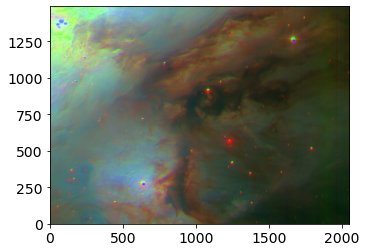

In [59]:
rgb_default = make_lupton_rgb(data_i,data_g, data_u,stretch=1.5,Q=10)

plt.imshow(rgb_default, origin='lower')

### Example

Image stacking.

In [60]:
from astropy.utils.data import download_file
base_url = 'http://data.astropy.org/tutorials/FITS-images/M13_blue_{0:04d}.fits'

image_list = [download_file(base_url.format(n), cache=True) 
              for n in range(1, 5+1)]
image_concat = [fits.getdata(image) for image in image_list]

In [61]:
final_image = np.sum(image_concat, axis=0)

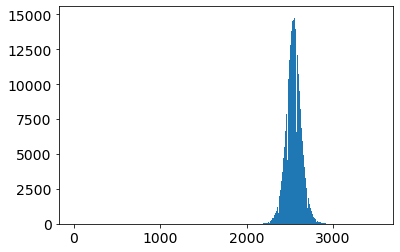

In [62]:
image_hist = plt.hist(final_image.flatten(), bins='auto')

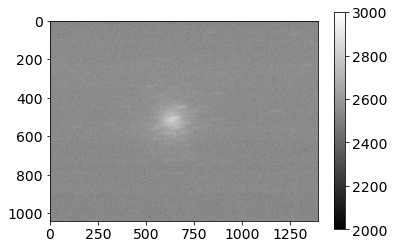

In [63]:
plt.imshow(final_image, cmap='gray', vmin=2e3, vmax=3e3)
plt.colorbar()

### Example

In this tutorial we analyze data from MN Lup, a T Tauri star in the Taurus-Auriga star forming region located at a distance of about 140 pc. MN Lup has been observed simultaneously with XMM-Newton and the UVES spectrograph on the VLT. MN Lup is suspected to be a classical T Tauri star, that is accreting mass from a circumstellar disk. MN Lup has been Doppler imaged by Strassmeier et al. 2005 with a very similar UVES setup and those authors claim an rotationally modulated accretion spot.

In the X-ray data we find moderate indications for accretion. In this tutorial we analyze (some of) the UVES data to search for rotationally modulated features in the emission line profiles, which could be due to an accretion spot on the stellar surface.

In [64]:
import pathlib
import tarfile

from astropy.utils.data import download_file
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
url = 'http://data.astropy.org/tutorials/UVES/data_UVES.tar.gz'
f = tarfile.open(download_file(url, cache=True), mode='r|*')
working_dir_path = pathlib.Path('~/.astropy/cache/download').expanduser()
f.extractall(path=working_dir_path)

In [66]:
from glob import glob
import os

import numpy as np

from astropy.wcs import WCS
from astropy.io import fits

# os.path.join is a platform-independent way to join two directories
globpath = working_dir_path / 'UVES'

print(globpath)

# glob searches through directories similar to the Unix shell
filelist = list(globpath.glob("*.fits"))

# sort alphabetically - given the way the filenames are
# this also sorts in time
filelist.sort()

/d/users/brock/.astropy/cache/download/UVES


In [67]:
sp = fits.open(filelist[0])
header = sp[0].header

wcs = WCS(header)
#make index array
index = np.arange(header['NAXIS1'])

wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
wavelength.shape
#Ahh, this has the wrong dimension. So we flatten it.
wavelength = wavelength.flatten()

flux = sp[0].data

In [68]:
def read_spec(filename):
    '''Read a UVES spectrum from the ESO pipeline

    Parameters
    ----------
    filename : string
    name of the fits file with the data

    Returns
    -------
    wavelength : np.ndarray
    wavelength (in Ang)
    flux : np.ndarray
    flux (in erg/s/cm**2)
    date_obs : string
    time of observation
    '''
    sp = fits.open(filename)
    header = sp[0].header

    wcs = WCS(header)
    #make index array
    index = np.arange(header['NAXIS1'])

    wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
    wavelength = wavelength.flatten()
    flux = sp[0].data

    date_obs = header['Date-OBS']
    return wavelength, flux, date_obs

In [69]:
def read_setup(filename):
    '''Get setup for UVES spectrum from the ESO pipeline

    Parameters
    ----------
    filename : string
    name of the fits file with the data

    Returns
    -------
    exposure_time : float
    wavelength_zero_point : float
    optical_arm : string
    '''
    sp = fits.open(filename)
    header = sp[0].header

    return header['EXPTIME'], header['CRVAL1'], header['HIERARCH ESO INS PATH']

# Let's just print the setup on the screen
# We'll see if it's all the same.
for f in filelist:
    print(read_setup(f))

(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.001, 3732.05623191818, 'BLUE')
(1200.001, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0012, 3732.05623191818, 'BLUE')
(1200.0011, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')
(1200.0013, 3732.05623191818, 'BLUE')


In [70]:
flux = np.zeros((len(filelist), len(wavelength)))
# date comes as string with 23 characters (dtype = 'S23')
date = np.zeros((len(filelist)), dtype = 'U23')

for i, fname in enumerate(filelist):
    w, f, date_obs = read_spec(fname)
    flux[i,:] = f
    date[i] = date_obs

In [71]:
import astropy.units as u
from astropy.constants.si import c, G, M_sun, R_sun

wavelength = wavelength * u.AA

# Let's define some constants we need for the exercises further down
# Again, we multiply the value with a unit here
heliocentric = -23. * u.km/u.s
v_rad = -4.77 * u.km / u.s  # Strassmeier et al. (2005)
R_MN_Lup = 0.9 * R_sun      # Strassmeier et al. (2005)
M_MN_Lup = 0.6 * M_sun      # Strassmeier et al. (2005)
vsini = 74.6 * u.km / u.s   # Strassmeier et al. (2005)
period = 0.439 * u.day      # Strassmeier et al. (2005)

inclination = 45. * u.degree # Strassmeier et al. (2005)
# All numpy trigonometric functions expect the input in radian.
# So far, astropy does not know this, so we need to convert the
# angle manually
incl = inclination.to(u.radian)

In [72]:
v_accr = (2.* G * M_MN_Lup/R_MN_Lup)**0.5 
print(v_accr)
# Maybe astronomers prefer it in the traditional cgs system?
print(v_accr.cgs)
# Or in some really obscure unit?
from astropy.units import imperial
print(v_accr.to(imperial.yd / u.hour))

504329.2809002659 m / s
50432928.09002659 cm / s
1985548350.0010464 yd / h


In [73]:
v_rot = vsini / np.sin(incl)
v_accr / v_rot

<Quantity 4780.3572986 m / km>

In [74]:
(v_accr / v_rot).decompose()

<Quantity 4.7803573>

In [75]:
wavelength = wavelength * (1. * u.dimensionless_unscaled+ heliocentric/c)

In [76]:
wavelength.to(u.keV, equivalencies=u.spectral())

<Quantity [0.0033224 , 0.00332237, 0.00332234, ..., 0.00248003, 0.00248002,
           0.00248   ] keV>

In [77]:
wavelength.to(u.Hz, equivalencies=u.spectral())

<Quantity [8.03351936e+14, 8.03345553e+14, 8.03339170e+14, ...,
           5.99669410e+14, 5.99665853e+14, 5.99662297e+14] Hz>

In [78]:
print(np.log10((G*M_MN_Lup/R_MN_Lup**2)/u.cm*u.second**2))

4.3077338588081275


In [79]:
waveclosetoHa = np.array([6562.,6563,6565.]) * u.AA

In [80]:
# This function uses the Doppler equivalency between wavelength and velocity
import astropy.units as u
def wave2doppler(w, w0):
    w0_equiv = u.doppler_optical(w0)
    w_equiv = w.to(u.km/u.s, equivalencies=w0_equiv)
    return w_equiv

print(wave2doppler(waveclosetoHa, 656.489 * u.nm).to(u.km/u.s))

[-131.9748242   -86.30879506    5.0232632 ] km / s


In [81]:
def w2vsini(w, w0):
    v = wave2doppler(w, w0) - 4.77 * u.km/u.s
    return v / vsini

In [82]:
from astropy.time import Time
t1 = Time(header['MJD-Obs'], format = 'mjd', scale = 'utc')
t2 = Time(header['Date-Obs'], scale = 'utc')

In [83]:
obs_times = Time(date, scale = 'utc')
delta_t = obs_times - Time(date[0], scale = 'utc')

In [84]:
delta_p = delta_t.value * u.day / period

In [85]:
def region_around_line(w, flux, cont):
    '''cut out and normalize flux around a line

    Parameters
    ----------
    w : 1 dim np.ndarray
    array of wavelengths
    flux : np.ndarray of shape (N, len(w))
    array of flux values for different spectra in the series
    cont : list of lists
    wavelengths for continuum normalization [[low1,up1],[low2, up2]]
    that described two areas on both sides of the line
    '''
    #index is true in the region where we fit the polynomial
    indcont = ((w > cont[0][0]) & (w < cont[0][1])) |((w > cont[1][0]) & (w < cont[1][1]))
    #index of the region we want to return
    indrange = (w > cont[0][0]) & (w < cont[1][1])
    # make a flux array of shape
    # (number of spectra, number of points in indrange)
    f = np.zeros((flux.shape[0], indrange.sum()))
    for i in range(flux.shape[0]):
        # fit polynomial of second order to the continuum region
        linecoeff = np.polyfit(w[indcont], flux[i, indcont], 2)
        # divide the flux by the polynomial and put the result in our
        # new flux array
        f[i,:] = flux[i,indrange] / np.polyval(linecoeff, w[indrange].value)
    return w[indrange], f

wcaII, fcaII = region_around_line(wavelength, flux,
    [[3925*u.AA, 3930*u.AA],[3938*u.AA, 3945*u.AA]])

In [86]:
ew = fcaII[0,:] - 1.
ew = ew[:-1] * np.diff(wcaII.to(u.AA).value)
print(ew.sum())

19.377607144785717


In [87]:
delta_lam = np.diff(wcaII.to(u.AA).value)
ew = np.sum((fcaII - 1.)[:,:-1] * delta_lam[np.newaxis, :], axis=1)

In [88]:
from astropy.table import Column, Table
from astropy.io import ascii

datecol = Column(name = 'Obs Date', data = date)
pcol = Column(name = 'phase', data = delta_p, format = '{:.1f}')
ewcol = Column(name = 'EW', data = ew, format = '{:.1f}', unit = '\\AA')
tab = Table((datecol, pcol, ewcol))
# latexdicts['AA'] contains the style specifics for A&A (\hline etc.)
tab.write(os.path.join(working_dir_path, 'EWtab.tex'), latexdict = ascii.latexdicts['AA'], overwrite=True)

In [89]:
x = w2vsini(wcaII, 393.366 * u.nm).decompose()

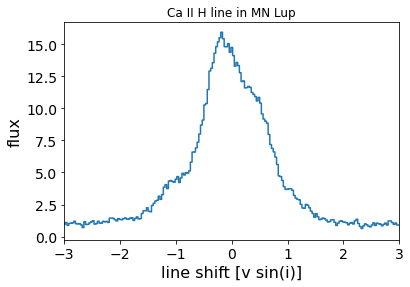

In [90]:
# set reasonable figsize for 1-column figures
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(x, fcaII[0,:], marker='', drawstyle='steps-mid')
ax.set_xlim([-3,+3])
ax.set_xlabel('line shift [v sin(i)]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
# when using this interface, we need to explicitly call the draw routine
plt.draw()

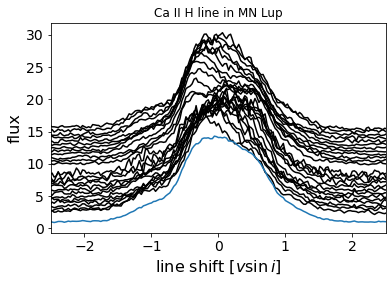

In [91]:
yshift = np.arange((fcaII.shape[0])) * 0.5
#shift the second night up by a little more
yshift[:] += 1.5
yshift[13:] += 1

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in range(25):
    ax.plot(x, fcaII[i,:]+yshift[i], 'k')

#separately show the mean line profile in a different color
ax.plot(x, np.mean(fcaII, axis =0))
ax.set_xlim([-2.5,+2.5])
ax.set_xlabel('line shift [$v \\sin i$]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
fig.subplots_adjust(bottom = 0.15)
plt.draw()

In [92]:
fmean = np.mean(fcaII, axis=0)
fdiff = fcaII - fmean[np.newaxis,:]

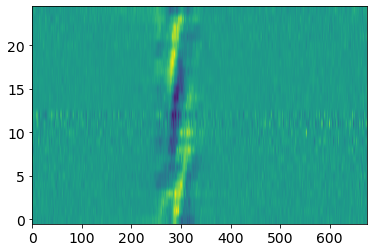

In [93]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(fdiff, aspect = "auto", origin = 'lower')

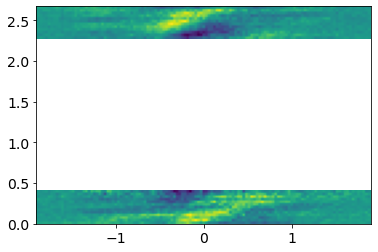

In [94]:
ind1 = delta_p < 1 * u.dimensionless_unscaled
ind2 = delta_p > 1 * u.dimensionless_unscaled

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for ind in [ind1, ind2]:
    im = ax.imshow(fdiff[ind,:], extent = (np.min(x), np.max(x), np.min(delta_p[ind]), np.max(delta_p[ind])), aspect = "auto", origin = 'lower')

ax.set_ylim([np.min(delta_p), np.max(delta_p)])
ax.set_xlim([-1.9,1.9])
plt.draw()

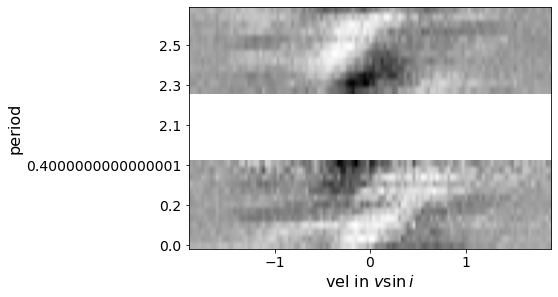

In [95]:
# shift a little for plotting purposes
pplot = delta_p.copy().value
pplot[ind2] -= 1.5
# image goes from x1 to x2, but really x1 should be middle of first pixel
delta_t = np.median(np.diff(delta_p))/2.
delta_x = np.median(np.diff(x))/2.
# imshow does the normalization for plotting really well, but here I do it
# by hand to ensure it goes -1,+1 (that makes color bar look good)
fdiff = fdiff / np.max(np.abs(fdiff))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for ind in [ind1, ind2]:
    im = ax.imshow(fdiff[ind,:],
    extent = (np.min(x)-delta_x, np.max(x)+delta_x,
    np.min(pplot[ind])-delta_t, np.max(pplot[ind])+delta_t),
    aspect = "auto", origin = 'lower', cmap = plt.cm.Greys_r)

ax.set_ylim([np.min(pplot)-delta_t, np.max(pplot)+delta_t])
ax.set_xlim([-1.9,1.9])
ax.set_xlabel('vel in $v\\sin i$')
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

def pplot(y, pos):
    'The two args are the value and tick position'
    'Function to make tick labels look good.'
    if y < 0.5:
        yreal = y
    else:
        yreal = y + 1.5
    return yreal

formatter = plt.FuncFormatter(pplot)
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('period')
fig.subplots_adjust(left = 0.15, bottom = 0.15, right = 0.99, top = 0.99)
plt.draw()

# Astropy

## World Coordinate Systems

In [96]:
import numpy as np
from astropy.io import fits
from astropy import wcs
from astropy.utils.data import download_file
import matplotlib.pyplot as plt
from astropy import coordinates
from astropy import units as u
%matplotlib inline

image_file = download_file('http://data.astropy.org/tutorials/FITS-images/HorseHead.fits', cache=True )

hdu_list = fits.open(image_file)
image_data = hdu_list[0].data
header = hdu_list[0].header

In [97]:
mywcs = wcs.WCS(header)

In [98]:
xpix, ypix = [50,100]
(ra,dec), = mywcs.wcs_pix2world([[xpix,ypix]], 0)

print(ra,dec)

85.38571908911656 -2.5552222679060703


In [99]:
pix_coords = [(20,30), (50,10), (500,200)]
world_coords = mywcs.wcs_pix2world(pix_coords, 0)
print(world_coords)

[[85.39411845 -2.57481635]
 [85.38569624 -2.58040414]
 [85.25949342 -2.52710878]]


In [100]:
my_coords = coordinates.SkyCoord(world_coords*u.deg, frame='fk5')
print(my_coords)
print(my_coords.to_string(style='hmsdms'))

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    [(85.39411845, -2.57481635), (85.38569624, -2.58040414),
     (85.25949342, -2.52710878)]>
['05h41m34.58842841s -02d34m29.33885042s', '05h41m32.5670964s -02d34m49.45489039s', '05h41m02.27842104s -02d31m37.59162085s']


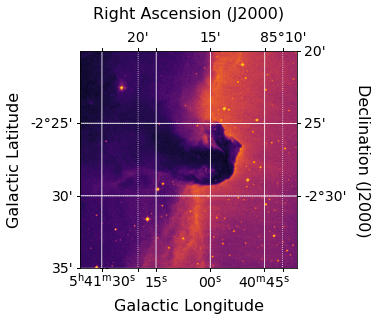

In [101]:
ax = plt.subplot(projection=mywcs, label='overlays')

ax.imshow(image_data, origin='lower', cmap='inferno')

ax.coords.grid(True, color='white', ls='solid')
ax.coords[0].set_axislabel('Galactic Longitude')
ax.coords[1].set_axislabel('Galactic Latitude')

overlay = ax.get_coords_overlay('fk5')
overlay.grid(color='white', ls='dotted')
overlay[0].set_axislabel('Right Ascension (J2000)')
overlay[1].set_axislabel('Declination (J2000)')

## Units

In [102]:
from astropy import units as u
15.1 * u.m / u.s

<Quantity 15.1 m / s>

In [103]:
(1.15e13 * u.km).to(u.pc)

<Quantity 0.37268962 pc>

In [104]:
e = 130. * u.eV
e.to(u.Angstrom, equivalencies=u.spectral())

<Quantity 95.37246033 Angstrom>

In [105]:
x = 1.4e11 * u.km / (0.7 * u.Myr)
x

<Quantity 2.e+11 km / Myr>

In [106]:
x.si

<Quantity 6.33761756 m / s>

In [107]:
x.cgs

<Quantity 633.76175628 cm / s>

In [108]:
d = np.array([1, 2, 3, 4]) * u.m
d.to(u.cm)

<Quantity [100., 200., 300., 400.] cm>

In [109]:
d.to(u.cm) * 1. / 50. * u.s ** -1

<Quantity [2., 4., 6., 8.] cm / s>

In [110]:
from astropy import constants as c
print(c.G)

  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018


In [111]:
F = (c.G * (3 * c.M_sun) * (2 * u.kg) / (1.5 * u.au) ** 2)
F

<Quantity 3.5389984e+20 kg m3 / (AU2 s2)>

In [112]:
F.to(u.N)

<Quantity 0.01581356 N>

### Example

We will demonstrate how using Quantity objects can facilitate a full derivation of the total mass of a molecular cloud using radio observations of isotopes of Carbon Monoxide (CO).

In [113]:
import numpy as np
import matplotlib.pyplot as plt

# You shouldn't use the `seed` function in real science code, but we use it here for example purposes.
# It makes the "random" number generator always give the same numbers wherever you run it.
np.random.seed(12345)

# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import astropy.units as u
from astropy.constants import G, h, k_B

from astropy.visualization import quantity_support

In [114]:
d = 250 * u.pc
Tex = 25 * u.K

In [115]:
# Cloud's center
cen_ra = 52.25 * u.deg
cen_dec = 0.25 * u.deg
cen_v = 15 * u.km/u.s

# Cloud's size
sig_ra = 3 * u.arcmin
sig_dec = 4 * u.arcmin
sig_v = 3 * u.km/u.s

#1D coordinate quantities
ra = np.linspace(52, 52.5, 100) * u.deg
dec = np.linspace(0, 0.5, 100) * u.deg
v = np.linspace(0, 30, 300) *u.km/u.s

#this creates data cubes of size for each coordinate based on the dimensions of the other coordinates
ra_cube, dec_cube, v_cube = np.meshgrid(ra, dec, v)

data_gauss = np.exp(-0.5*((ra_cube-cen_ra)/sig_ra)**2 + 
                    -0.5*((dec_cube-cen_dec)/sig_dec)**2 + 
                    -0.5*((v_cube-cen_v)/sig_v)**2 )

In [116]:
data = data_gauss * u.K

In [117]:
# Average pixel size
# This is only right if dec ~ 0, because of the cos(dec) factor.
dra = (ra.max() - ra.min()) / len(ra)
ddec = (dec.max() - dec.min()) / len(dec)

#Average velocity bin width
dv = (v.max() - v.min()) / len(v)
print("""dra = {0}
ddec = {1}
dv = {2}""".format(dra.to(u.arcsec), ddec.to(u.arcsec), dv))

dra = 18.0 arcsec
ddec = 18.0 arcsec
dv = 0.1 km / s


In [118]:
intcloud = np.sum(data*dv, axis=2)
intcloud.unit

Unit("K km / s")

Text(0, 0.5, 'Dec (deg)')

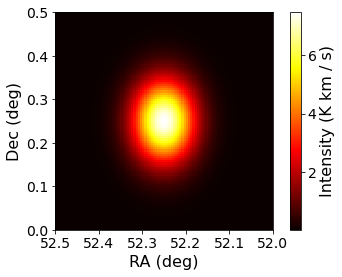

In [119]:
#Note that we display RA in the convential way by going from max to min
plt.imshow(intcloud.value, 
           origin='lower', 
           extent=[ra.value.max(), ra.value.min(), dec.value.min(), dec.value.max()], 
           cmap='hot', 
           interpolation='nearest', 
           aspect='equal')
plt.colorbar().set_label("Intensity ({})".format(intcloud.unit))
plt.xlabel("RA (deg)")
plt.ylabel("Dec (deg)")

In [120]:
lambda13 = 2.60076 * u.mm
lambda18 = 2.73079 * u.mm

In [121]:
nu13 = lambda13.to(u.Hz, equivalencies=u.spectral())
nu18 = lambda18.to(u.Hz, equivalencies=u.spectral())

In [122]:
nu13 = 115271096910.13396 * u.Hz
nu18 = 109782318669.689 * u.Hz
A13 = 7.4e-8 / u.s
A18 = 8.8e-8 / u.s

C = 3e14 * (nu18/nu13)**3 * (A13/A18) / (u.K * u.cm**2 * u.km *(1/u.s))
C

<Quantity 2.17924582e+14 s / (cm2 K km)>

In [123]:
B = h * nu18 / (k_B * Tex)

In [124]:
print('{0}\n{1}'.format(B, B.decompose()))

0.21074881298143522 Hz s
0.21074881298143522


In [125]:
NCO = C * np.sum(data*dv, axis=2) / (1 - np.exp(-B))
print("Peak CO column density: ")
np.max(NCO)

Peak CO column density: 


<Quantity 8.5782091e+15 1 / cm2>

In [126]:
H2_CO_ratio = 5.9e6
NH2 = NCO * H2_CO_ratio
print("Peak H2 column density: ")
np.max(NH2)

Peak H2 column density: 


<Quantity 5.06114337e+22 1 / cm2>

In [127]:
mH2 = 2 * 1.008 * u.Dalton  #aka atomic mass unit/amu
rho = NH2 * mH2

In [128]:
dap = dra * ddec
print(dap)

2.5e-05 deg2


In [129]:
da = (dap * d**2).to(u.pc**2, equivalencies=u.dimensionless_angles())
da

<Quantity 0.00047596 pc2>

In [130]:
da.to(u.cm**2)

<Quantity 4.53185339e+33 cm2>

In [131]:
M = np.sum(rho * da)
M.decompose().to(u.solMass)

<Quantity 317.64843091 solMass>

## Time

In [132]:
import numpy as np

from astropy.time import Time

times = ['1999-01-01T00:00:00.123456789', '2010-01-01T00:00:00']

t = Time(times, format='isot', scale='utc')

In [133]:
t

<Time object: scale='utc' format='isot' value=['1999-01-01T00:00:00.123' '2010-01-01T00:00:00.000']>

In [134]:
t[1]

<Time object: scale='utc' format='isot' value=2010-01-01T00:00:00.000>

In [135]:
t = Time(times, format='isot')

In [136]:
t.jd

array([2451179.50000143, 2455197.5       ])

In [137]:
t.mjd

array([51179.00000143, 55197.        ])

In [138]:
t.tt.jd

array([2451179.5007443 , 2455197.50076602])

In [139]:
dt = t[1] - t[0]
dt

<TimeDelta object: scale='tai' format='jd' value=4018.00002171925>

In [140]:
t.sidereal_time('apparent', 'greenwich') 

<Longitude [6.68050174, 6.70281946] hourangle>

In [141]:
import astropy.units as u

Time("2020-01-01") + 5 * u.day

<Time object: scale='utc' format='iso' value=2020-01-06 00:00:00.000>

In [142]:
t = Time('2001-03-22 00:01:44.732327132980', scale='utc', location=('120d', '40d'))

In [143]:
t.sidereal_time('apparent', 'greenwich')  

<Longitude 12. hourangle>

In [144]:
t.sidereal_time('apparent')  

<Longitude 20. hourangle>

In [145]:
nt = Time.now()
nt

<Time object: scale='utc' format='datetime' value=2023-06-08 22:18:25.297350>

In [146]:
t = Time('2006-01-15 21:24:37.5', scale='utc', location=('120d', '45d'))

In [147]:
t.sidereal_time('mean')  

<Longitude 13.08952187 hourangle>

In [148]:
t.sidereal_time('apparent')  

<Longitude 13.08950367 hourangle>

In [149]:
t.earth_rotation_angle()  

<Longitude 13.08436206 hourangle>

In [150]:
t.sidereal_time('apparent', 'greenwich')  

<Longitude 5.08950367 hourangle>

In [151]:
t.sidereal_time('apparent', '-90d')  

<Longitude 23.08950367 hourangle>

In [152]:
t.sidereal_time('apparent', '-90d', 'IAU1994')  

<Longitude 23.08950365 hourangle>

### Example

The arrival times of photons at an observatory are not particularly useful for accurate timing work, such as eclipse/transit timing of binaries or exoplanets. This is because the changing location of the observatory causes photons to arrive early or late. The solution is to calculate the time the photon would have arrived at a standard location; either the Solar System barycenter or the heliocenter.

Suppose you observed the dwarf nova IP Peg from Greenwich and have a list of times in MJD form, in the UTC timescale. You then create appropriate Time and SkyCoord objects and calculate light travel times to the barycenter as follows:

In [153]:
from astropy import time, coordinates as coord, units as u

ip_peg = coord.SkyCoord("23:23:08.55", "+18:24:59.3",unit=(u.hourangle, u.deg), frame='icrs')

greenwich = coord.EarthLocation.of_site('greenwich')  
times = time.Time([56325.95833333, 56325.978254], format='mjd',scale='utc', location=greenwich)  

ltt_bary = times.light_travel_time(ip_peg)  
ltt_bary 

<TimeDelta object: scale='tdb' format='jd' value=[-0.0037715  -0.00377286]>

In [154]:
ltt_helio = times.light_travel_time(ip_peg, 'heliocentric') 
ltt_helio 

<TimeDelta object: scale='tdb' format='jd' value=[-0.00376576 -0.00376712]>

## Coordinates

![coords](https://camo.githubusercontent.com/6268d4ec72cdc8c76511c00b3425fbffcda735a0a01119d73d02037e1aef333b/68747470733a2f2f736b79616e6474656c6573636f70652e6f72672f77702d636f6e74656e742f75706c6f6164732f52412d4465632d77696b692d546f6d2d5275656e43432d42592d53412d332e302e6a7067)

In [155]:
from astropy.coordinates import SkyCoord, EarthLocation
import astropy.coordinates as coords

c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree)
c = SkyCoord(10.625, 41.2, unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))
c

<SkyCoord (ICRS): (ra, dec) in deg
    (10.625, 41.2)>

In [156]:
c.ra

<Longitude 10.625 deg>

In [157]:
c.dec

<Latitude 41.2 deg>

In [158]:
c.ra.degree

10.625

In [159]:
c.ra.hms

hms_tuple(h=0.0, m=42.0, s=30.000000000000426)

In [160]:
c.galactic.l

<Longitude 121.12334339 deg>

In [161]:
c.galactic.b

<Latitude -21.6403587 deg>

In [162]:
c.transform_to('fk5')

<SkyCoord (FK5: equinox=J2000.000): (ra, dec) in deg
    (10.62501153, 41.20000147)>

In [163]:
c = SkyCoord(ra=10.68458*u.degree, dec=41.26917*u.degree, distance=770*u.kpc)

In [164]:
c.cartesian.x

<Quantity 568.71286542 kpc>

In [165]:
c.cartesian.y

<Quantity 107.3008974 kpc>

In [166]:
c.cartesian.z

<Quantity 507.88994292 kpc>

In [167]:
c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2 = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')

c1.separation_3d(c2)

<Distance 1.52286024 pc>

In [168]:
obstime = Time('2017-2-14')

target = SkyCoord.from_name('M31')

keck = EarthLocation.of_site('Keck')

target.radial_velocity_correction(obstime=obstime, location=keck).to('km/s')

<Quantity -22.35980045 km / s>

### Example

We will use data from the Gaia mission to get sky positions, distances (parallaxes), proper motions, and radial velocities for a set of stars that are close to the Sun. We will then transform these observed, heliocentric kinematic measurements to Galactocentric Cartesian coordinates.

In [169]:
# astropy imports
import astropy.coordinates as coord
from astropy.table import QTable
import astropy.units as u
from astroquery.gaia import Gaia

# Third-party imports
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [170]:
query_text = '''SELECT TOP 4096 ra, dec, parallax, pmra, pmdec, radial_velocity,
phot_g_mean_mag, phot_bp_mean_mag, phot_rp_mean_mag
FROM gaiadr2.gaia_source
WHERE parallax_over_error > 10 AND
    parallax > 10 AND
    radial_velocity IS NOT null
ORDER BY random_index
'''

job = Gaia.launch_job(query_text)
gaia_data = job.get_results()
gaia_data.write('gaia_data.fits', overwrite=True)

gaia_data = QTable.read('gaia_data.fits')

In [171]:
gaia_data[:4]

ra,dec,parallax,pmra,pmdec,radial_velocity,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
deg,deg,mas,mas / yr,mas / yr,km / s,mag,mag,mag
float64,float64,float64,float64,float64,float64,float32,float32,float32
256.8370985186671,46.5081010273448,10.770964834345387,-19.76657104695835,55.92605676622464,-17.673072044811907,12.956912994384766,14.192928314208984,11.859498023986816
129.45826809010867,-6.806694022293258,41.081670013380716,-297.34595349374183,43.83424795415093,35.53814452290586,6.576352119445801,6.931065082550049,6.111272811889648
2.317856723637118,9.00699655780345,17.824765284426462,-171.8278607514459,-1083.8740928197751,-148.91780163518774,13.119074821472168,13.968703269958496,12.223302841186523
330.41287472805976,51.88897801553169,13.0756133009657,-85.30745872006916,-34.23366534215265,-28.726469345049587,12.101919174194336,13.05264949798584,11.149785995483398


In [172]:
dist = coord.Distance(parallax=u.Quantity(gaia_data['parallax']))
dist.min(), dist.max()

(<Distance 8.79909291 pc>, <Distance 99.99985292 pc>)

In [173]:
c = coord.SkyCoord(ra=gaia_data['ra'], 
                   dec=gaia_data['dec'],
                   distance=dist,
                   pm_ra_cosdec=gaia_data['pmra'], 
                   pm_dec=gaia_data['pmdec'],
                   radial_velocity=gaia_data['radial_velocity'])

In [174]:
c[:4]

<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, pc)
    [(256.83709852, 46.50810103, 92.84219338),
     (129.45826809, -6.80669402, 24.3417563 ),
     (  2.31785672,  9.00699656, 56.1017205 ),
     (330.41287473, 51.88897802, 76.47824825)]
 (pm_ra_cosdec, pm_dec, radial_velocity) in (mas / yr, mas / yr, km / s)
    [( -19.76657105,    55.92605677,  -17.67307204),
     (-297.34595349,    43.83424795,   35.53814452),
     (-171.82786075, -1083.87409282, -148.91780164),
     ( -85.30745872,   -34.23366534,  -28.72646935)]>

In [175]:
c.galactic[:4]

<SkyCoord (Galactic): (l, b, distance) in (deg, deg, pc)
    [( 72.32926334,  36.8367097 , 92.84219338),
     (232.07542475,  19.9763116 , 24.3417563 ),
     (105.68646983, -52.44715126, 56.1017205 ),
     ( 98.28701089,  -2.66800849, 76.47824825)]
 (pm_l_cosb, pm_b, radial_velocity) in (mas / yr, mas / yr, km / s)
    [(  55.13035551,   21.88801174,  -17.67307204),
     (-195.30630898, -228.4545973 ,   35.53814452),
     (-455.13470935, -998.57912013, -148.91780164),
     ( -88.74713695,   23.94268239,  -28.72646935)]>

In [176]:
coord.Galactocentric()

<Galactocentric Frame (galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.122 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=20.8 pc, roll=0.0 deg)>

In [177]:
galcen = c.transform_to(coord.Galactocentric(z_sun=0*u.pc, galcen_distance=8.1*u.kpc))

In [178]:
galcen[:4]

<SkyCoord (Galactocentric: galcen_coord=<ICRS Coordinate: (ra, dec) in deg
    (266.4051, -28.936175)>, galcen_distance=8.1 kpc, galcen_v_sun=(12.9, 245.6, 7.78) km / s, z_sun=0.0 pc, roll=0.0 deg): (x, y, z) in pc
    [(-8077.44468803,  70.79989896,  55.66242071),
     (-8114.06090109, -18.04601124,   8.31586669),
     (-8109.24493623,  32.92015736, -44.47693151),
     (-8111.0109288 ,  75.59768012,  -3.55986822)]
 (v_x, v_y, v_z) in km / s
    [(-16.26556759, 233.98501167,   4.89424163),
     (-30.94107553, 226.00094753,  -4.85474972),
     (210.89926667, -11.75804787, -36.02277769),
     ( 48.81632893, 222.24147077,  17.78803683)]>

Text(0.5, 0, '$z$ [$\\mathrm{pc}$]')

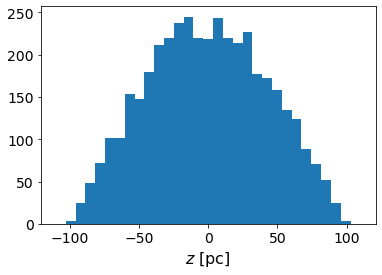

In [179]:
plt.hist(galcen.z.value, bins=np.linspace(-110, 110, 32))
plt.xlabel('$z$ [{0:latex_inline}]'.format(galcen.z.unit))

Text(0, 0.5, '$v_y$ [$\\mathrm{km\\,s^{-1}}$]')

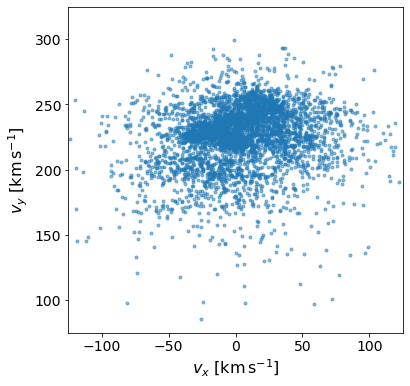

In [180]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.plot(galcen.v_x.value, galcen.v_y.value,
        marker='.', linestyle='none', alpha=0.5)

ax.set_xlim(-125, 125)
ax.set_ylim(200-125, 200+125)

ax.set_xlabel('$v_x$ [{0:latex_inline}]'.format(u.km/u.s))
ax.set_ylabel('$v_y$ [{0:latex_inline}]'.format(u.km/u.s))

## Cosmology

In [181]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)
cosmo

FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)

In [182]:
cosmo.comoving_volume(6.5)

<Quantity 2.52437825e+12 Mpc3>

In [183]:
from astropy.cosmology import WMAP5, WMAP9
WMAP5.age(0)

<Quantity 13.72378195 Gyr>

In [184]:
WMAP9.age(0)

<Quantity 13.76889912 Gyr>

In [185]:
WMAP9.kpc_proper_per_arcmin(4) * 10 / 60.

<Quantity 71.21374477 kpc / arcmin>

In [186]:
WMAP9.H(1.5) # what is the Hubble parameter at redshift 1.5?

<Quantity 157.97313665 km / (Mpc s)>

In [187]:
WMAP9.Ode(3) # density parameter for dark energy at redshift z=3 (in units of critical density)

0.03740695834664705

In [188]:
WMAP9.critical_density(3) # critical density at z=3

<Quantity 1.72139427e-28 g / cm3>

In [189]:
WMAP9.Tcmb(1000) # CMB temperature at z=1000

<Quantity 2727.725 K>

In [190]:
WMAP9.angular_diameter_distance(2) # Angular diameter distancein Mpc at z=2.

<Quantity 1763.91012479 Mpc>

In [191]:
WMAP9.arcsec_per_kpc_comoving(3) # Angular separation in arcseccorresponding to a comoving kpc at z=3

<Quantity 0.03171401 arcsec / kpc>

In [192]:
WMAP9.scale_factor(4) # a = 1/(1+z)

0.2

In [193]:
WMAP9.age(1000) # Age of universe at z=1000

<Quantity 0.00043435 Gyr>

In [194]:
from astropy.cosmology import Flatw0waCDM
cosmo = Flatw0waCDM(H0=70, Om0=0.3, w0=-1, wa=0.2)

In [195]:
cosmo.kpc_proper_per_arcmin(4) * 10 / 60.

<Quantity 68.88990428 kpc / arcmin>

### Example

Each redshift corresponds to an age of the universe, so if you're plotting some quantity against redshift, it's often useful show the universe age too. The relationship between the two changes depending the type of cosmology you assume, which is where astropy.cosmology comes in. In this tutorial we'll show how to use the tools in astropy.cosmology to make a plot like this:

In [196]:
# Set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

import numpy as np

# In this case we just need to define the matter density 
# and hubble parameter at z=0.

# Note the default units for the hubble parameter H0 are km/s/Mpc. 
# We will pass in a `Quantity` object with the units specified. 

cosmo = FlatLambdaCDM(H0=70*u.km/u.s/u.Mpc, Om0=0.3)

In [197]:
zvals = np.arange(0, 6, 0.1)
dist = cosmo.angular_diameter_distance(zvals)

In [198]:
ages = np.array([13, 10, 8, 6, 5, 4, 3, 2, 1.5, 1.2, 1])*u.Gyr

from astropy.cosmology import z_at_value
ageticks = [z_at_value(cosmo.age, age) for age in ages]

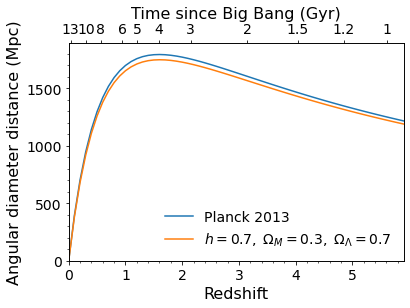

In [199]:
from astropy.cosmology import Planck13
dist2 = Planck13.angular_diameter_distance(zvals)

fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)
ax.plot(zvals, dist2, label='Planck 2013')
ax.plot(zvals, dist, label=
        '$h=0.7,\ \Omega_M=0.3,\ \Omega_\Lambda=0.7$')
ax.legend(frameon=0, loc='lower right')
ax2 = ax.twiny()
ax2.set_xticks(ageticks)
ax2.set_xticklabels(['{:g}'.format(age) for age in ages.value])
zmin, zmax = 0.0, 5.9
ax.set_xlim(zmin, zmax)
ax2.set_xlim(zmin, zmax)
ax2.set_xlabel('Time since Big Bang (Gyr)')
ax.set_xlabel('Redshift')
ax.set_ylabel('Angular diameter distance (Mpc)')
ax.minorticks_on()
ax.set_ylim(0, 1890)
plt.show()

# Scipy

    Special functions (scipy.special)
    Integration (scipy.integrate)
    Optimization (scipy.optimize)
    Interpolation (scipy.interpolate)
    Fourier Transforms (scipy.fft)
    Signal Processing (scipy.signal)
    Linear Algebra (scipy.linalg)
    Sparse eigenvalue problems with ARPACK
    Compressed Sparse Graph Routines (scipy.sparse.csgraph)
    Spatial data structures and algorithms (scipy.spatial)
    Statistics (scipy.stats)
    Multidimensional image processing (scipy.ndimage)
    File IO (scipy.io)

## Special Functions

### Example

Bessel functions.

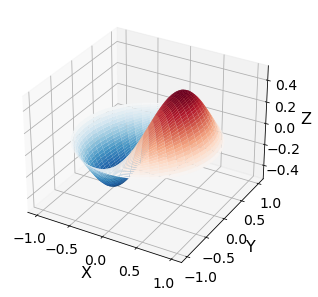

In [200]:
from scipy import special
import numpy as np
import matplotlib.pyplot as plt


def drumhead_height(n, k, distance, angle, t):
   kth_zero = special.jn_zeros(n, k)[-1]
   return np.cos(t) * np.cos(n*angle) * special.jn(n, distance*kth_zero)

theta = np.r_[0:2*np.pi:50j]
radius = np.r_[0:1:50j]

x = np.array([r * np.cos(theta) for r in radius])
y = np.array([r * np.sin(theta) for r in radius])
z = np.array([drumhead_height(1, 1, r, theta, 0.5) for r in radius])

fig = plt.figure()

ax = fig.add_axes(rect=(0, 0.05, 0.95, 0.95), projection='3d')
ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='RdBu_r', vmin=-0.5, vmax=0.5)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_zlabel('Z')
plt.show()

## Integration

### Example

Gaussian quadrature integration of a bessel function.

In [201]:
import scipy.integrate as integrate
import scipy.special as special

result = integrate.quad(lambda x: special.jv(2.5,x), 0, 4.5)

result

(1.1178179380783253, 7.866317182537226e-09)

### Example

Double Gaussian quadrature

In [202]:
from scipy.integrate import dblquad

area = dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)
area

(0.010416666666666668, 4.101620128472366e-16)

### Example

Integrating samples using Simpson's rule

In [203]:
import numpy as np

def f1(x):
    return x**2


def f2(x):
    return x**3

x = np.array([1,3,4])
y1 = f1(x)

from scipy import integrate
I1 = integrate.simpson(y1, x)

print(I1)

21.0


### Example

Solving an initial value ODE.

In [204]:
from scipy.integrate import solve_ivp
from scipy.special import gamma, airy

y1_0 = +1 / 3**(2/3) / gamma(2/3)
y0_0 = -1 / 3**(1/3) / gamma(1/3)

y0 = [y0_0, y1_0]

def func(t, y):
    return [t*y[1],y[0]]

t_span = [0, 4]
sol1 = solve_ivp(func, t_span, y0)

print("sol1.t: {}".format(sol1.t))

sol1.t: [0.         0.10097672 1.04643602 1.91060117 2.49872472 3.08684827
 3.62692846 4.        ]


## Fourier Transforms

### Examples

Fast Fourier transform of two sin functions.

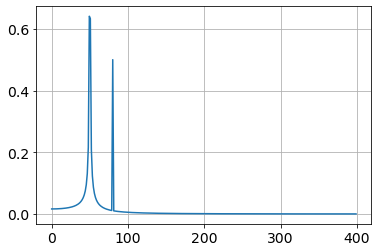

In [205]:
from scipy.fft import fft, fftfreq

import numpy as np

# Number of sample points

N = 600

# sample spacing

T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N, endpoint=False)

y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

yf = fft(y)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plt.grid()

plt.show()

## Interpolation

### Example

Cubic spline

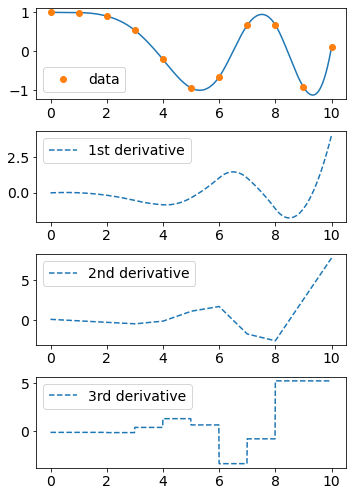

In [206]:
from scipy.interpolate import CubicSpline

x = np.linspace(0, 10, num=11)
y = np.cos(-x**2 / 9.)

spl = CubicSpline(x, y)

fig, ax = plt.subplots(4, 1, figsize=(5, 7))

xnew = np.linspace(0, 10, num=1001)

ax[0].plot(xnew, spl(xnew))
ax[0].plot(x, y, 'o', label='data')
ax[1].plot(xnew, spl(xnew, nu=1), '--', label='1st derivative')
ax[2].plot(xnew, spl(xnew, nu=2), '--', label='2nd derivative')
ax[3].plot(xnew, spl(xnew, nu=3), '--', label='3rd derivative')

for j in range(4):
    ax[j].legend(loc='best')

plt.tight_layout()
plt.show()

## Curve Fitting

In [207]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit

In [208]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [209]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise

In [210]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([2.47230013, 1.19083844, 0.506896  ])

In [211]:
popt2, pcov2 = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt2

array([2.42051731, 1.        , 0.42939263])

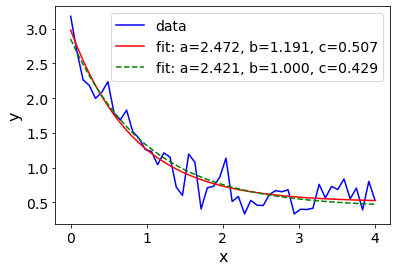

In [212]:
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, func(xdata, *popt2), 'g--',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Example

Continuum emission with three spectral lines.

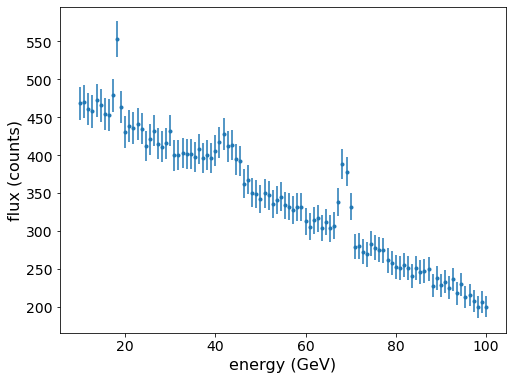

In [213]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as sciopt

def gauss(x, amplitude=1, mu=0, sig=1):
    return amplitude * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def linear(x,*params):
    a, b = params
    return a*x + b

energy = np.linspace(10,100,100)

spectral_line1 = gauss(energy, *[50, 42.1, 3])
spectral_line2 = gauss(energy, *[100, 68.7, 1])
spectral_line3 = gauss(energy, *[100, 18.1, 0.5])

counts = (linear(energy,-3, 500) + #continuum spectrum
spectral_line1 + #line emission
spectral_line2 + #line emission
spectral_line3 + #line emission
          
np.random.normal(0, 7, size=len(energy))) #statisticalnoise)
#for this example, we will say that the errors on our measurements have to do with the counting errors
#So we will use Poissonian statistics here:
errors = np.sqrt(counts)
#Note that this assumes that the response of the detector is uniform across all energies; in reality this is not the case;
#These would get tied up in **systematic** uncertainties and the instrument response function.
#We'll touch on this another time.
plt.figure(figsize=[8,6])
plt.errorbar(energy,counts,errors, fmt='.')
plt.xlabel("energy (GeV)")
plt.ylabel("flux (counts)")
plt.show()

Continuum slope               :  -2.99 +-   0.03
continuum intercept           : 500.80 +-   2.00
peak0_A                       : 107.30 +-   9.37
peak0_mu                      :  18.12 +-   0.07
peak0_sigma                   :   0.53 +-   0.05
peak1_A                       :  46.75 +-   4.55
peak1_mu                      :  42.30 +-   0.26
peak1_sigma                   :   2.34 +-   0.26
peak2_A                       : 100.63 +-   6.76
peak2_mu                      :  68.59 +-   0.07
peak2_sigma                   :   0.95 +-   0.07


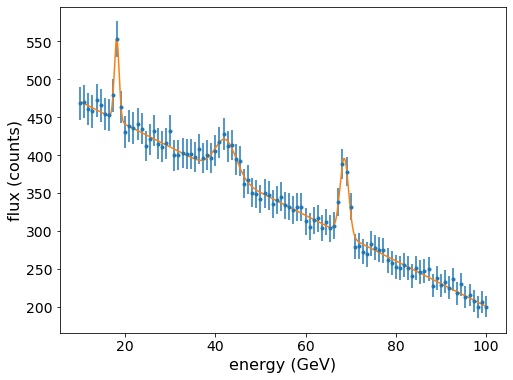

In [214]:
def custom_model(x, *params):
    return linear(x, *params[0:2]) + gauss(x, *params[2:5]) + gauss(x, *params[5:8]) + gauss(x, *params[8:11])

guess = np.array([-10, 500, 200, 20, 3, 200, 40, 3, 200, 68, 3], dtype=float)
fit_energy=np.linspace(energy[0], energy[-1], len(energy)*100)
coeff, cov = sciopt.curve_fit(custom_model, energy, counts, p0=guess, sigma=errors)
coeff_error = np.sqrt(np.diag(cov))

param_names = ["Continuum slope", "continuum intercept","peak0_A", "peak0_mu", "peak0_sigma","peak1_A", "peak1_mu", "peak1_sigma","peak2_A", "peak2_mu", "peak2_sigma"]

for name, param,error in zip(param_names, coeff, coeff_error):
    print("{0:30s}: {1:6.2f} +- {2:6.2f}".format(name, param, error))
    
plt.figure(figsize=[8,6])
plt.errorbar(energy,counts,errors, fmt='.')

plt.xlabel("energy (GeV)")
plt.ylabel("flux (counts)")
plt.plot(fit_energy, custom_model(fit_energy, *coeff))
plt.show()
#TS = calc_chisquare(counts, errors, custom_model(energy, *coeff))
#NDF = len(contaminated_pulse) - len(coeff)
#print("chisquare/NDF = {0:.2f} / {1:d} = {2:.2f}".format(TS, NDF, TS / float(NDF)))

# Many other modules!!!

- pandas
    - https://pandas.pydata.org/

- emcee
    - https://emcee.readthedocs.io/en/stable/

- PyMC
    - https://www.pymc.io/projects/docs/en/stable/learn.html

- Sunpy
    - https://sunpy.org/

- astroplan
    - https://astroplan.readthedocs.io/en/latest/

- CCD proc
    - https://ccdproc.readthedocs.io/en/latest/

- exoplanet
    - https://docs.exoplanet.codes/en/latest/
    
- astroquery
    - https://astroquery.readthedocs.io/en/latest/
    


# References

Very in depth astronomy use case for Python. Dives straight in.
https://python4astronomers.github.io/index.html

More top level beginner accessible tutorial.
https://github.com/HorizonIITM/PythonForAstronomy

Absolute numpy beginner tutorial.
https://numpy.org/doc/stable/user/absolute_beginners.html

In depth Python 3 introductory bootcamp.
https://github.com/Pierian-Data/Complete-Python-3-Bootcamp

Python Cheatsheet.
https://gto76.github.io/python-cheatsheet/

Astropy built-in tutorials.
https://learn.astropy.org/

Scipy tutorials.
https://docs.scipy.org/doc/scipy/tutorial/